In [4]:
import numpy as np

import matplotlib

matplotlib.use("Agg")
import matplotlib.pyplot as plt

from matplotlib.animation import FFMpegWriter

# Fixing random state for reproducibility
np.random.seed(19680801)


metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0, y0 = 0, 0


for i in range(100):
    x0 += 0.1 * np.random.randn()
    y0 += 0.1 * np.random.randn()
    l.set_data(x0, y0)
    writer.grab_frame()

plt.show()

/var/folders/v4/ydstng2j755cv7zt4xl8lksr0000gp/T/ipykernel_44161/3701840057.py:30: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  l.set_data(x0, y0)


AttributeError: 'FFMpegWriter' object has no attribute 'fig'

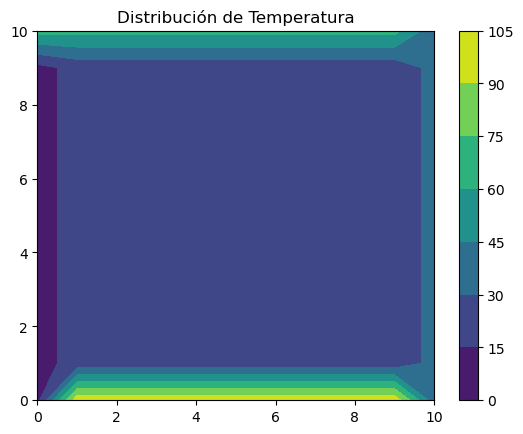

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

k = 0.5
Lx = 10
Ly = 10
dx = 1
dy = 1
Tfin = 20
dt = 0.1
condicion = 1/8 * (dx**2 + dy**2) / k

x = np.arange(0, Lx + dx, dx)
y = np.arange(0, Ly + dy, dy)
t = np.arange(0, Tfin + dt, dt)

T = np.zeros((len(y), len(x), len(t)))
T[:, :, 0] = 20
T[0, :, :] = 100
T[:, 0, :] = 10
T[-1, :, :] = 65
T[:, -1, :] = 35

for l in range(len(t) - 1):
    for j in range(1, len(y) - 1):
        for i in range(1, len(x) - 1):
            d2Tdx2 = (T[j, i + 1, l] - 2 * T[j, i, l] + T[j, i - 1, l]) / dx**2
            d2Tdy2 = (T[j + 1, i, l] - 2 * T[j, i, l] + T[j - 1, i, l]) / dy**2
            T[j, i, l + 1] = T[j, i, l] + k * dt * (d2Tdy2 + d2Tdx2)

# Gráficas
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()
contour = ax.contourf(X, Y, T[:, :, 0])
fig.colorbar(contour)
ax.set_title('Distribución de Temperatura')

def update(frame):
    ax.clear()
    contour = ax.contourf(X, Y, T[:, :, frame])
    return contour

ani = animation.FuncAnimation(fig, update, frames=len(t),init_func=contour)
plt.show()


In [4]:
T[:,:,0]

array([[ 10., 100., 100., 100., 100., 100., 100., 100., 100., 100.,  35.],
       [ 10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  35.],
       [ 10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  35.],
       [ 10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  35.],
       [ 10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  35.],
       [ 10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  35.],
       [ 10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  35.],
       [ 10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  35.],
       [ 10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  35.],
       [ 10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  35.],
       [ 65.,  65.,  65.,  65.,  65.,  65.,  65.,  65.,  65.,  65.,  35.]])